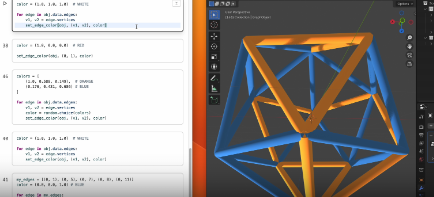

In [ ]:
import bpy
import bmesh
import random

blend_file_path = "n3d_color_edge_to_face_brady.blend"
bpy.ops.wm.open_mainfile(filepath=blend_file_path)

In [ ]:
COLLECTION_NAME = "MyGraph"

# Function to clear previous objects in the collection
def clear_previous_objects(collection_name):
    collection = bpy.data.collections.get(collection_name)
    if collection:
        for obj in collection.objects:
            bpy.data.objects.remove(obj, do_unlink=True)
    else:
        # Create the collection if it doesn't exist
        collection = bpy.data.collections.new(collection_name)
        bpy.context.scene.collection.children.link(collection)
    return collection

# Function to create the graph from nodes and edges
def create_graph_from_points(node_positions, edges, collection_name):
    collection = clear_previous_objects(collection_name)
    
    # Create a new mesh and object
    mesh = bpy.data.meshes.new("GraphMesh")
    obj = bpy.data.objects.new("GraphObject", mesh)
    collection.objects.link(obj)
    
    # Create a BMesh to add vertices and edges
    bm = bmesh.new()
    bm_verts = []
    for key, co in sorted(node_positions.items()):
        bm_verts.append(bm.verts.new(co))
    
    # Add edges
    for edge in edges:
        v1, v2 = edge
        bm.edges.new((bm_verts[v1], bm_verts[v2]))
    
    # Write the bmesh to the mesh
    bm.to_mesh(mesh)

    # Float vector attribute (color) for edges
    attr_name = 'my_edge_color'
    colors = [
        (1.0, 0.0, 0.0),  # Red
        (0.0, 1.0, 0.0)   # Green
    ]
    
    # Get or create the vector attribute
    vector_attr = obj.data.attributes.get(attr_name) or obj.data.attributes.new(
        name=attr_name, type='FLOAT_VECTOR', domain='EDGE')
    
    # Assign random color values to the vector attribute for each edge
    random_values = []
    for _ in obj.data.edges:
        color = random.choice(colors)
        random_values.extend(color)
    
    # Ensure we have one RGB triplet per edge
    assert len(random_values) == len(obj.data.edges) * 3
    
    # Set the values to the attribute
    vector_attr.data.foreach_set('vector', random_values)
    
    # Apply the Geometry Nodes modifier
    modifier = obj.modifiers.new(name="GeometryNodes", type='NODES')
    modifier.node_group = bpy.data.node_groups["setup_network"]
    
    modifier["Socket_3"] = 20 
    
    # Update the object to reflect changes
    obj.data.update()

    return obj

# Define the node positions and edges
node_positions = {
    0: [-0.81, -0.48, 0.38],
    1: [0.13, -0.97, 0.27],
    2: [0.91, -0.24, 0.40],
    3: [0.81, 0.48, -0.38],
    4: [-0.02, 0.20, -1.00],
    5: [-0.44, -0.70, -0.59],
    7: [-0.62, 0.55, 0.58],
    8: [0.01, -0.20, 1.00],
    9: [0.44, 0.70, 0.59],
    10: [-0.13, 0.97, -0.27],
    11: [-0.91, 0.24, -0.40],
    6: [0.63, -0.55, -0.59],
}

edges = [(0, 1), (0, 5), (0, 7), (0, 8), (0, 11), (1, 2), (1, 5), (1, 6), 
         (1, 8), (2, 3), (2, 6), (2, 8), (2, 9), (3, 4), (3, 6), (3, 9), (3, 10), 
         (4, 5), (4, 6), (4, 10), (4, 11), (5, 6), (5, 11), (7, 8), (7, 9), (7, 10), (7, 11), 
         (8, 9), (9, 10), (10, 11)]

# Create the graph in the "MyGraph" collection
obj = create_graph_from_points(node_positions, edges, COLLECTION_NAME)


colors = [
    (1.0, 1.0, 0.0), 
    (0.0, 1.0, 0.0)   
]

random_values = []
for _ in obj.data.edges:
    color = random.choice(colors)
    random_values.extend(color)

vector_attr = obj.data.attributes.get('my_edge_color')
vector_attr.data.foreach_set('vector', random_values)
obj.data.update()

In [ ]:
# Function to set the color of a specific edge
def set_edge_color(obj, edge_tuple, color):
    # Find the index of the edge that matches the edge_tuple
    edge_index = None
    for i, edge in enumerate(obj.data.edges):
        v1, v2 = edge.vertices
        if (v1, v2) == edge_tuple or (v2, v1) == edge_tuple:
            edge_index = i
            break

    # If the edge is found, set its color
    if edge_index is not None:
        vector_attr = obj.data.attributes.get('my_edge_color')
        vector_attr.data[edge_index].vector = color
        obj.data.update()



In [47]:
color = (1.0, 1.0, 1.0)  # WHITE

for edge in obj.data.edges:
    v1, v2 = edge.vertices
    set_edge_color(obj, (v1, v2), color)

In [48]:
color = (1.0, 0.0, 0.0)  # RED

set_edge_color(obj, (0, 1), color) 

In [49]:
colors = [
    (1.0, 0.588, 0.149),  # ORANGE
    (0.176, 0.431, 0.686) # BLUE
]

for edge in obj.data.edges:
    v1, v2 = edge.vertices
    color = random.choice(colors)
    set_edge_color(obj, (v1, v2), color)

In [50]:
color = (1.0, 1.0, 1.0)  # WHITE

for edge in obj.data.edges:
    v1, v2 = edge.vertices
    set_edge_color(obj, (v1, v2), color)

In [51]:
my_edges = [(0, 1), (0, 5), (0, 7), (0, 8), (0, 11)]
color = (0.0, 0.0, 1.0) # BLUE

for edge in my_edges:
    set_edge_color(obj, edge, (0.0, 0.0, 1.0))  
